In [1]:
from ete3 import Tree
from ete3 import PhyloTree
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt

In [44]:
t1 = Tree("required_tree_OG0000002_raw.txt", format=1)
t2 = Tree("required_tree_OG0000300_raw.txt", format=1)

In [168]:
t1 = PhyloTree("required_tree_OG0000002_species.txt", format=1)
t2 = PhyloTree("required_tree_OG0000002_species.txt", format=1)

In [171]:
t1.cophenetic_matrix

TypeError: get_distance() missing 1 required positional argument: 'target'

In [156]:
t1.set_species_naming_function(lambda node: node.name.split("_")[2:])

In [159]:
for node in t1:
    node.name = '_'.join(node.name.split("_")[0:2])

In [160]:
print (t1.get_ascii(attributes=["name", "species"],show_internal=False))


                                                                     /-c_inopinata, []
                                                                    |
                                                                    |                        /- /-c_elegans, []
                                                                    |                     /-|
                                                                    |                  /-|   \- /-c_elegans, []
                                                                    |                 |  |
                                                                    |               /-|   \-c_elegans, []
                                                                    |              |  |
                                                                    |              |  |      /-c_elegans, []
                                                                  /-|            /-|   \- /-|
                                    

In [137]:
for node in t1.split_by_dups(): print (node)


   /-t_britovi
  |
--|   /-o_tipulae
  |  |
   \-|      /-d_pachys
     |   /-|
     |  |   \-d_pachys
      \-|
        |   /-d_coronatus
         \-|
            \-d_coronatus

   /-c_panamensis
--|
   \-c_inopinata

                  /-c_elegans
               /-|
            /-|   \-c_elegans
           |  |
         /-|   \-c_elegans
        |  |
        |  |   /-c_elegans
      /-|   \-|
     |  |      \-c_elegans
   /-|  |
  |  |   \-c_elegans
  |  |
--|   \-c_elegans
  |
  |   /-c_briggsae
   \-|
     |   /-c_briggsae
      \-|
         \-c_briggsae

--c_brenneri

      /-c_briggsae
   /-|
--|   \-c_briggsae
  |
   \-c_japonica

      /-c_briggsae
   /-|
--|   \-c_briggsae
  |
   \-c_elegans

--c_brenneri

--p_pacificus

               /-a_nanus
            /-|
           |  |   /-a_nanus
         /-|   \-|
        |  |      \-a_nanus
        |  |
        |   \-p_redivivus
        |
        |                     /-b_malayi
        |                  /-|
        |              

In [141]:
t2_wo_dups = t2.collapse_lineage_specific_expansions()
t1_wo_dups = t1.collapse_lineage_specific_expansions()

In [167]:
t2.compare(t1)

TreeError: 'Duplicated items found in source tree'

In [146]:
t1.collapse_lineage_specific_expansions()

PhyloTree node 'n0' (-0x7ffff805fbf7c8f5)

In [149]:
print (t1_wo_dups.get_ascii( show_internal=False))


                                                                     /-c_inopinata
                                                                    |
                                                                  /-|         /-c_elegans
                                                                 |  |      /-|
                                                                 |   \- /-|   \-c_briggsae
                                                         /- /- /-|        |
                                                        |        |         \-c_brenneri
                                                        |        |
                                                      /-|         \-c_panamensis
                                                     |  |
                                                     |  |      /-c_japonica
                                                     |   \- /-|
                                                /- /-|         \-c_briggsae


# Just Simple Correlation

In [260]:
par1_tree = PhyloTree("required_tree_OG0000002_species.txt", format=1)
pkc3_tree = PhyloTree("required_tree_OG0000300_species.txt", format=1)

In [261]:
par1 = par1_tree.cophenetic_matrix()
pkc3 = pkc3_tree.cophenetic_matrix()

In [262]:
par1_df = pd.DataFrame(par1[0], columns = par1[1])
par1_df.index = par1[1]
pkc3_df = pd.DataFrame(pkc3[0], columns = pkc3[1])
pkc3_df.index = pkc3[1]
common = np.intersect1d(par1_df.columns, pkc3_df.columns)
par1_df = par1_df[par1_df.index.isin(common)]
par1_df= par1_df[common]
pkc3_df = pkc3_df[pkc3_df.index.isin(common)]
pkc3_df= pkc3_df[common]

In [263]:
common

array(['a_loa', 'a_suum', 'b_malayi', 'c_brenneri', 'c_briggsae',
       'c_elegans', 'c_inopinata', 'c_japonica', 'c_panamensis',
       'd_coronatus', 'd_pachys', 'o_tipulae', 'o_volvulus', 'p_arcanus',
       'p_entomophagus', 'p_japonicus', 'p_mayer', 'p_redivivus',
       'p_univalens', 's_digitata', 's_scapterisci'], dtype=object)

In [264]:
pkc3_df[pkc3_df.index.isin(['a_loa'])]['a_loa']

a_loa    0.0
Name: a_loa, dtype: float64

In [265]:
x = par1_df.stack().reset_index()
# x['level_0_par1'] =x["level_0"]
x["labels"] = x["level_0"] +' '+ x["level_1"]
x['par1_values'] = x[0]

y = pkc3_df.stack().reset_index()
y["labels"] = y["level_0"] +' '+ y["level_1"]
y['pkc3_values'] = y[0]

In [266]:
xy = pd.merge(x, y, how="inner",on=['labels', 'level_0', 'level_1'] )

In [108]:
xy = pd.concat([x,y], axis=1).round(2)

In [123]:
r = (par1_df.dot(pkc3_df).sum().sum())/(np.sqrt(((par1_df-par1_df.mean().mean())**2).sum().sum())*np.sqrt(((pkc3_df-pkc3_df.mean().mean())**2).sum().sum()))

In [124]:
r

106.53135002109849

In [267]:
import plotly.express as px
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures

for species in xy['level_0'].unique():
    species_df = xy[xy['level_0']==species]
    X =  species_df['par1_values'].values.reshape(-1,1)
    Y = species_df['pkc3_values'].values.reshape(-1,1)

    model = Ridge(fit_intercept=True)
    model.fit(X,Y)
    xy.loc[xy['level_0']==species, 'R2'] = model.score(X, Y)

In [296]:
data_cluster = xy['R2']

from sklearn.cluster import KMeans, DBSCAN


clustering = KMeans(n_clusters=3, random_state=0).fit(data_cluster.values.reshape(-1,1))

xy['clusters'] = clustering.labels_.astype(str)

for i in clustering.labels_.astype(str):
    xy.loc[xy['clusters']==i,'clusters_R2_max'] = str(xy.loc[xy['clusters']==i,'R2'].round(2).min())+' to ' + str(xy.loc[xy['clusters']==i,'R2'].round(2).max())
    xy.loc[xy['clusters']==i,'std_clusters_par1'] = xy.loc[xy['clusters']==i,'par1_values'].round(2).std()
    xy.loc[xy['clusters']==i,'std_clusters_pkc3'] = xy.loc[xy['clusters']==i,'pkc3_values'].round(2).std()
    xy.loc[xy['clusters']==i,'mean_clusters_par1'] = xy.loc[xy['clusters']==i,'par1_values'].round(2).mean()
    xy.loc[xy['clusters']==i,'mean_clusters_pkc3'] = xy.loc[xy['clusters']==i,'pkc3_values'].round(2).mean()
    
    



In [312]:
xy['mean_clusters_pkc3'].round(2)

0      0.34
1      0.34
2      0.34
3      0.34
4      0.34
       ... 
436    0.40
437    0.40
438    0.40
439    0.40
440    0.40
Name: mean_clusters_pkc3, Length: 441, dtype: float64

In [314]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Bar(
    name='par1',
    x=xy["clusters_R2_max"].unique().tolist(), y=xy["mean_clusters_par1"].round(2).unique().tolist(),
    error_y=dict(type='data', array=xy['std_clusters_par1'].round(2).unique().tolist())  
))
fig.add_trace(go.Bar(
    name='pkc3',
    x=xy["clusters_R2_max"].unique().tolist(), y=xy["mean_clusters_pkc3"].round(3).unique().tolist(),
    error_y=dict(type='data', array=xy['std_clusters_pkc3'].round(3).unique().tolist())
))
fig.update_layout(barmode='group')
fig.update_layout(
    title="Distribution of Distances in R2 clusters",
    xaxis_title="R2 clusters",
    yaxis_title="Distances",
    legend_title="Species",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"
    )
)

fig.show()
fig.write_html("test_cluster_distance_distribution.html")

In [259]:
fig = px.scatter(xy, x="par1_values", y="pkc3_values", color = 'clusters_R2_max',
                 hover_name="labels", hover_data=['par1_values', 'pkc3_values', 'R2'],
            
#                  trendline="ols", trendline_color_override='darkblue'
                 )


# fig.add_shape(type="line",
#     x0=0, y0=0, x1=2, y1=2,
#     line=dict(
#         color="LightSeaGreen",
#         width=4,
#         dash="dashdot",
#     )
# )
# fig.add_traces(px.scatter(xy, x="par1_values", y="pkc3_values", color = 'level_0_par1'))
# fig.add_trace(
#     go.Scatter(
#         mode='markers',
#         x=xy["par1_values"],
#         y=xy["pkc3_values"],
#         marker=dict(
#             color='LightSkyBlue',
#             opacity=0.0
#             ),

#         )
    
#     )

print(xy.pivot_table('R2',['level_0'],'clusters_R2_max').fillna(''))
fig.show()
fig.write_html("test_plot.html")

clusters_R2_max 0.11 to 0.14 0.25 to 0.3 0.35 to 0.53
level_0                                              
a_loa                                        0.389077
a_suum              0.115471                         
b_malayi                                     0.351845
c_brenneri                                   0.436722
c_briggsae                                   0.391056
c_elegans                                    0.374502
c_inopinata                                  0.355423
c_japonica                                   0.534438
c_panamensis                                 0.374931
d_coronatus                                  0.439751
d_pachys                                     0.447866
o_tipulae           0.143733                         
o_volvulus                                   0.370176
p_arcanus                                    0.425382
p_entomophagus                  0.245549             
p_japonicus                                  0.390713
p_mayer                     

In [128]:
results = px.get_trendline_results(fig)

In [134]:
results.px_fit_results.iloc[0].params

array([0.10236349, 0.19212751])

In [324]:
 pkc3_df

,a_loa,a_suum,b_malayi,c_brenneri,c_briggsae,c_elegans,c_inopinata,c_japonica,c_panamensis,d_coronatus,...,o_tipulae,o_volvulus,p_arcanus,p_entomophagus,p_japonicus,p_mayer,p_redivivus,p_univalens,s_digitata,s_scapterisci
a_loa,0.000000,0.284312,0.056092,0.370684,0.372342,0.366647,0.362831,0.697813,0.361306,0.346878,...,0.405884,0.065543,0.307724,0.316653,0.325277,0.314252,0.532710,0.349182,0.092866,0.394770
a_suum,0.284312,0.000000,0.276042,0.456666,0.458324,0.452629,0.448813,0.783795,0.447288,0.432860,...,0.491866,0.269617,0.393706,0.402635,0.411259,0.400234,0.618692,0.435164,0.306372,0.480752
b_malayi,0.056092,0.276042,0.000000,0.362414,0.364072,0.358377,0.354561,0.689543,0.353036,0.338608,...,0.397614,0.057273,0.299454,0.308383,0.317007,0.305982,0.524440,0.340912,0.084596,0.386500
c_brenneri,0.370684,0.456666,0.362414,0.000000,0.041512,0.062841,0.076881,0.463741,0.127234,0.292614,...,0.384818,0.355989,0.348860,0.357789,0.366413,0.355388,0.617578,0.375550,0.392744,0.421138
c_briggsae,0.372342,0.458324,0.364072,0.041512,0.000000,0.064499,0.078539,0.465399,0.128892,0.294272,...,0.386476,0.357647,0.350518,0.359447,0.368071,0.357046,0.619236,0.377208,0.394402,0.422796
c_elegans,0.366647,0.452629,0.358377,0.062841,0.064499,0.000000,0.072844,0.459704,0.123197,0.288577,...,0.380781,0.351952,0.344823,0.353752,0.362376,0.351351,0.613541,0.371513,0.388707,0.417101
c_inopinata,0.362831,0.448813,0.354561,0.076881,0.078539,0.072844,0.000000,0.455888,0.119381,0.284761,...,0.376965,0.348136,0.341007,0.349936,0.358560,0.347535,0.609725,0.367697,0.384891,0.413285
c_japonica,0.697813,0.783795,0.689543,0.463741,0.465399,0.459704,0.455888,0.000000,0.432889,0.619743,...,0.711947,0.683118,0.675989,0.684918,0.693542,0.682517,0.944707,0.702679,0.719873,0.748267
c_panamensis,0.361306,0.447288,0.353036,0.127234,0.128892,0.123197,0.119381,0.432889,0.000000,0.283236,...,0.375440,0.346611,0.339482,0.348411,0.357035,0.346010,0.608200,0.366172,0.383366,0.411760
d_coronatus,0.346878,0.432860,0.338608,0.292614,0.294272,0.288577,0.284761,0.619743,0.283236,0.000000,...,0.361012,0.332183,0.325054,0.333983,0.342607,0.331582,0.593772,0.351744,0.368938,0.397332


NameError: name 'n' is not defined

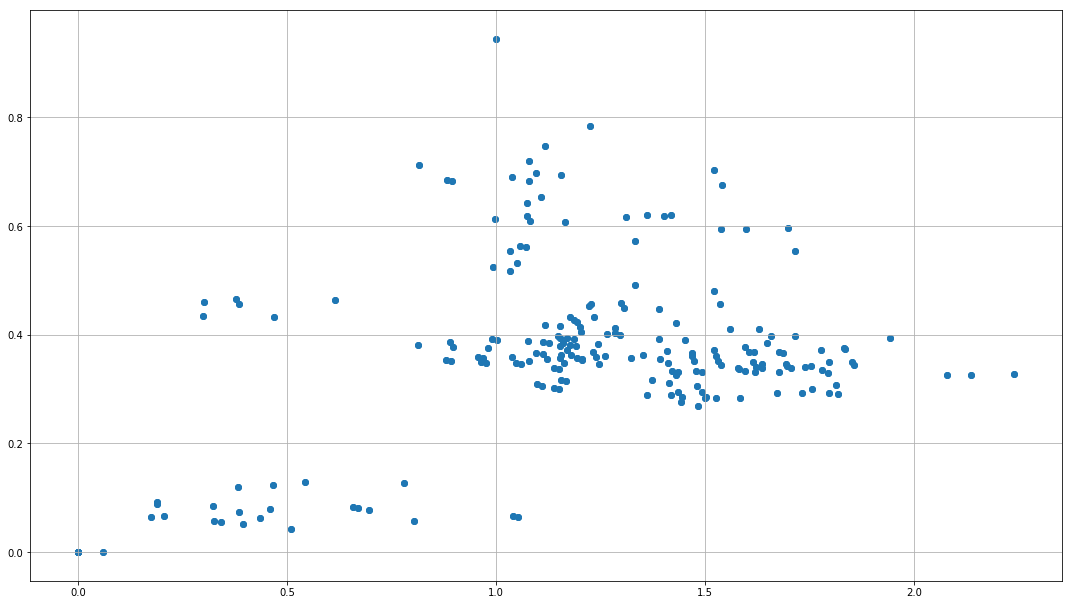

In [314]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)

ax.grid()

# for i, txt in enumerate(par1_df.columns):
#     for j, txt1 in enumerate(par1_df.columns):
#         ax.scatter(par1_df[par1_df.index.isin([txt])][txt], pkc3_df[pkc3_df.index.isin([txt])][txt])
#         ax.annotate(txt+txt1, (par1_df[par1_df.index.isin([txt])][txt], pkc3_df[pkc3_df.index.isin([txt])][txt]))
z = par1_df.to_numpy().flatten()
y = pkc3_df.to_numpy().flatten()
n = 
ax.scatter(z, y)

for zz,yy,txt in np.broadcast(z,y, n):
    ax.annotate(txt, (zz,yy))

In [322]:
import itertools
[i for i in itertools.permutations(par1_df.columns, len(pkc3_df.columns))]

KeyboardInterrupt: 